**Lab 3: Spectral Representation**

The goal of this lab is to gain familiarity with the spectral representations in Python, specially the spectrograms.

In [93]:
!git clone https://github.com/pzinemanas/sis1lab.git

import os
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

from sis1lab.util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram, plot_spectrum_at, save_audio

fatal: destination path 'sis1lab' already exists and is not an empty directory.


First upload your reference signal and plot the first seconds of it.

In [94]:
!git clone https://github.com/JamesBedsonUPF/sis1_group9.git
filepath = "./sis1_group9/HarpSound.wav"
ref, fs = load_audio(filepath)


fatal: destination path 'sis1_group9' already exists and is not an empty directory.


In [95]:
frequency = 1071.277
period = 1 / frequency
start = 0.1
rad_frequency = 2 * np.pi * frequency
t1 = 0.1004771
our_phi = - rad_frequency * t1
end = start + 5 * period
plot_signals(ref, fs, start, end)

# **Exercises**

**1. Spectrograms**

A spectrogram is found by estimating the frequency content in short sections of the signal. The magnitude of the spectrum over individual sections is plotted as intensity or color on a two-dimensional plot versus frequency and time. The length of each section, or window length, determines the frequency resolution. Longer windows give good frequency resolution but fail to
track frequency changes well. Shorter windows have poor frequency resolution, but good tracking.

In Python the function `spectrogram` from the `scipy.signal` package will
compute the spectrogram. A common call to the function is defined as follows. No need to understand the meaning of each parameter at this stage. Note that we provide the `plot_spectrogram` function to plot the spectrogram.

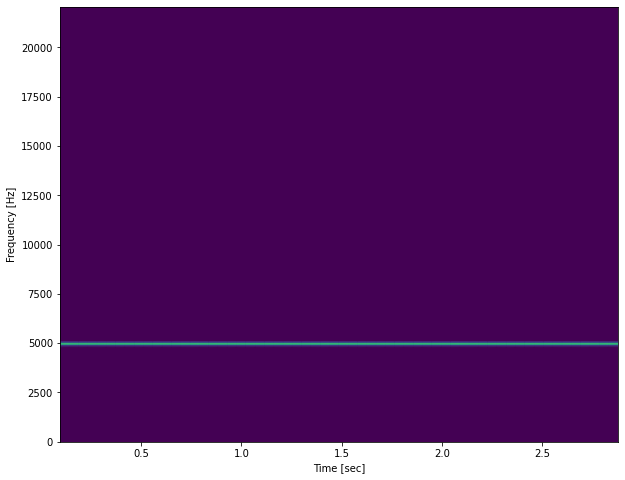

In [96]:
from scipy import signal

#define signal
A = 0.8
f0 = 5000.0
phi = np.pi/2
fs = 44100
t = np.arange(0, 3, 1.0/fs)
x = A * np.cos(2*np.pi*f0*t + phi)

# calculate the spectrogram
window_length = 8192
ff, tt, S = signal.spectrogram(x, fs, nperseg=window_length, noverlap=window_length/2)

# plot the spectrogram
plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S)
plt.show()

We can plot the spectrum of the signal at an specific time using the `plot_spectrum_at` function. For instance, we can see the spectrum of the signal at the 0.5 seconds:

In [97]:
plot_spectrum_at(ff, tt, S, 0.5)

1.1. Calculate and plot the spectrogram of your reference signal. Use `plt.ylim` to select the limits of the y axis in order to zoom in the region of interest. For instance if you want to see the region between 0 and 4000 Hz, you can call `plt.ylim([0, 4000])` after the `plot_spectrogram` function.


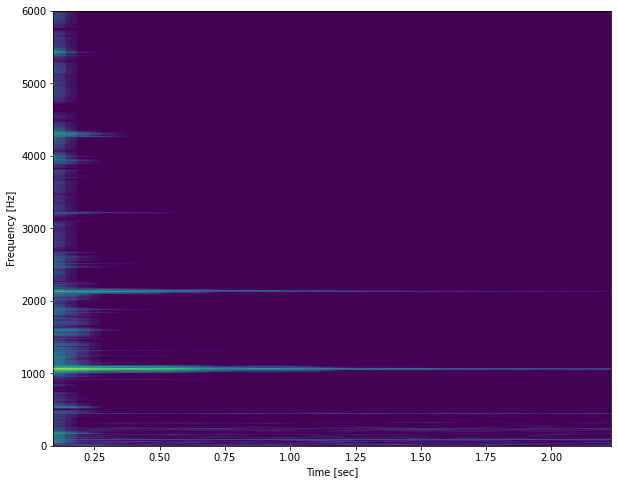

In [98]:
window_length = 8192
ff, tt, S = signal.spectrogram(ref, fs, nperseg=window_length, noverlap=window_length/2)

plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S)
plt.ylim([0, 6000])
plt.show()


1.2. Select a time where almost all harmonics are present and plot the spectrum at that time.

In [99]:
plot_spectrum_at(ff, tt, S, 0.15)

1.3. Use the cursor for measuring the weights of the fundamental frequency and some harmonics (6-10)

In [100]:
weights = [1, 0.11245, 0.008772, 0.01561, 0.001569, 0.0012267, 0.000644, 0.0006886015, 0.000566, 0.000487, 0.000531]

**2. Synthesis**:

Let's define a function to synthetize an harmonic singal which receives the fundamental frequency ($f_0$) and the weights ($A_k$) of each harmonic and the time vector ($t$). This is similar to what you did in Lab 3- Ex3.2.


In [101]:
def synthesize(f0, phi, Ak, t):
  y = 0
  for k in range(1, len(Ak) + 1):
    y += Ak[k-1] * np.cos(2*np.pi*k*f0*t + k*phi - (k-1)*np.pi/2)
  return y

2.1. Use the `synthetize` function to generate a synthesis with the weights ($A_k$) found in 1.3 and the fundamental frequency and phases found in previous labs. Plot both the reference and the synthetize signal. Listen to the synthetize signal.

In [102]:
t = np.arange(0, 2, 1/fs)
synthesized_signal = synthesize(frequency, our_phi, weights, t)
synthesized_signal = (weights[1] * synthesized_signal-0.001) / np.amax(synthesized_signal)


plot_signals([ref, synthesized_signal], fs, start, end, ["reference signal", "our signal"])


In [105]:
ipd.Audio(synthesized_signal, rate=fs)

#ipd.Audio(ref, rate=fs)

2.2. Calculate the spectrogram of the synthesized signal `S_synt`; and compare the spectrums of both signals at the same time using `plot_spectrum_at(ff, tt, [S_ref, S_synt], time)`, where `S_ref`is spectrogram of the reference signal.

**Note:** use the same window length to calculate both spectrograms.

In [104]:
window_length = 8192
ff, tt, S_synt = signal.spectrogram(synthesized_signal, fs, nperseg=window_length, noverlap=window_length/2)
ff, tt, S = signal.spectrogram(ref, fs, nperseg=window_length, noverlap=window_length/2)

plot_spectrum_at(ff, tt, [S, S_synt], 0.15)


2.3. Compare the spectrograms of the two signals. What are the main differences?

The main difference is the missing frequency information between the harmonics of our sinthesized signal. This may be because the reference signal contains frequency information from other sound sources (such as the finger plucking the string, the reverb of the room, background noise...)

We can also see that the harmonics of the reference signal are also not perfect, as there is a displacement between the theoretical harmonics and the actual harmonics. This difference becomes more noticeable from the fifth harmonic onwards.

2.4. Listen to the two audios (reference and synthesized). What are the main differences?

The most noticeable difference between both signals, is how the amplitude evolves over time. The synthesized signal has a constant amplitude and a constant frequency spectrum, whereas the reference signal has an envelope and frequencies whose amplitudes change over time.

Comparing the synthesized signal from this lab with the one from lab 2, we can slightly perceive higher frequencies which makes it more close to the reference signal.